##**Cost-Sensitive Classification**
This code evaluates the performance of several classification models on the breast cancer dataset from scikit-learn. It includes both standard and cost-sensitive variants of Decision Trees and Random Forests, as well as versions of these models that are trained with synthetic data augmentation via SMOTE (Synthetic Minority Over-sampling Technique). The performance of these models is assessed using confusion matrices, as well as three key metrics: AUC (Area Under the Curve), precision, and recall. Let's break down the key components of the code:

- Dataset Loading
  -load_breast_cancer(return_X_y=True): Loads the breast cancer dataset, which is a binary classification dataset where the goal is to predict whether breast cancer cells are malignant or benign based on features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. X and y represent the features and labels, respectively.
- Data Splitting
  - train_test_split(...): Splits the dataset into training and testing sets, ensuring that the models are evaluated on unseen data.
- Model Definition
  - Models are defined using DecisionTreeClassifier and RandomForestClassifier from scikit-learn, including their cost-sensitive versions which are adjusted via the class_weight parameter. This parameter allows the models to pay more attention to the minority class by assigning a higher cost to misclassifying instances of that class.
  - SMOTE-enhanced models are created using an ImbPipeline, which includes a SMOTE step for oversampling the minority class in the training data, potentially improving model performance on imbalanced datasets.
- Model Training and Evaluation
  - Each model is trained on the training set and then used to make predictions on the test set.
  - The performance of each model is evaluated using several metrics:
    - AUC (Area Under the Curve) measures the model's ability to discriminate between the classes. A higher AUC indicates better performance, with a value of 1.0 being perfect and 0.5 indicating no discriminative power.
    - Precision measures the proportion of true positive predictions in all positive predictions made by the model. It reflects the model's accuracy in identifying positive instances.
    - Recall (also known as sensitivity) measures the proportion of actual positive instances that were correctly identified by the model. It reflects the model's ability to capture positive instances.
- Visualization
  - For each model, a confusion matrix is plotted to visualize the true positives, true negatives, false positives, and false negatives.
  - The AUC, precision, and recall values are displayed in the plot titles to provide a quick overview of each model's performance.

Summary

This code demonstrates a comprehensive evaluation of machine learning models on an imbalanced dataset, showcasing the effects of cost-sensitive learning and data augmentation via SMOTE on model performance. By comparing standard, cost-sensitive, and SMOTE-augmented models, it highlights different strategies to improve classification outcomes in the presence of class imbalance.







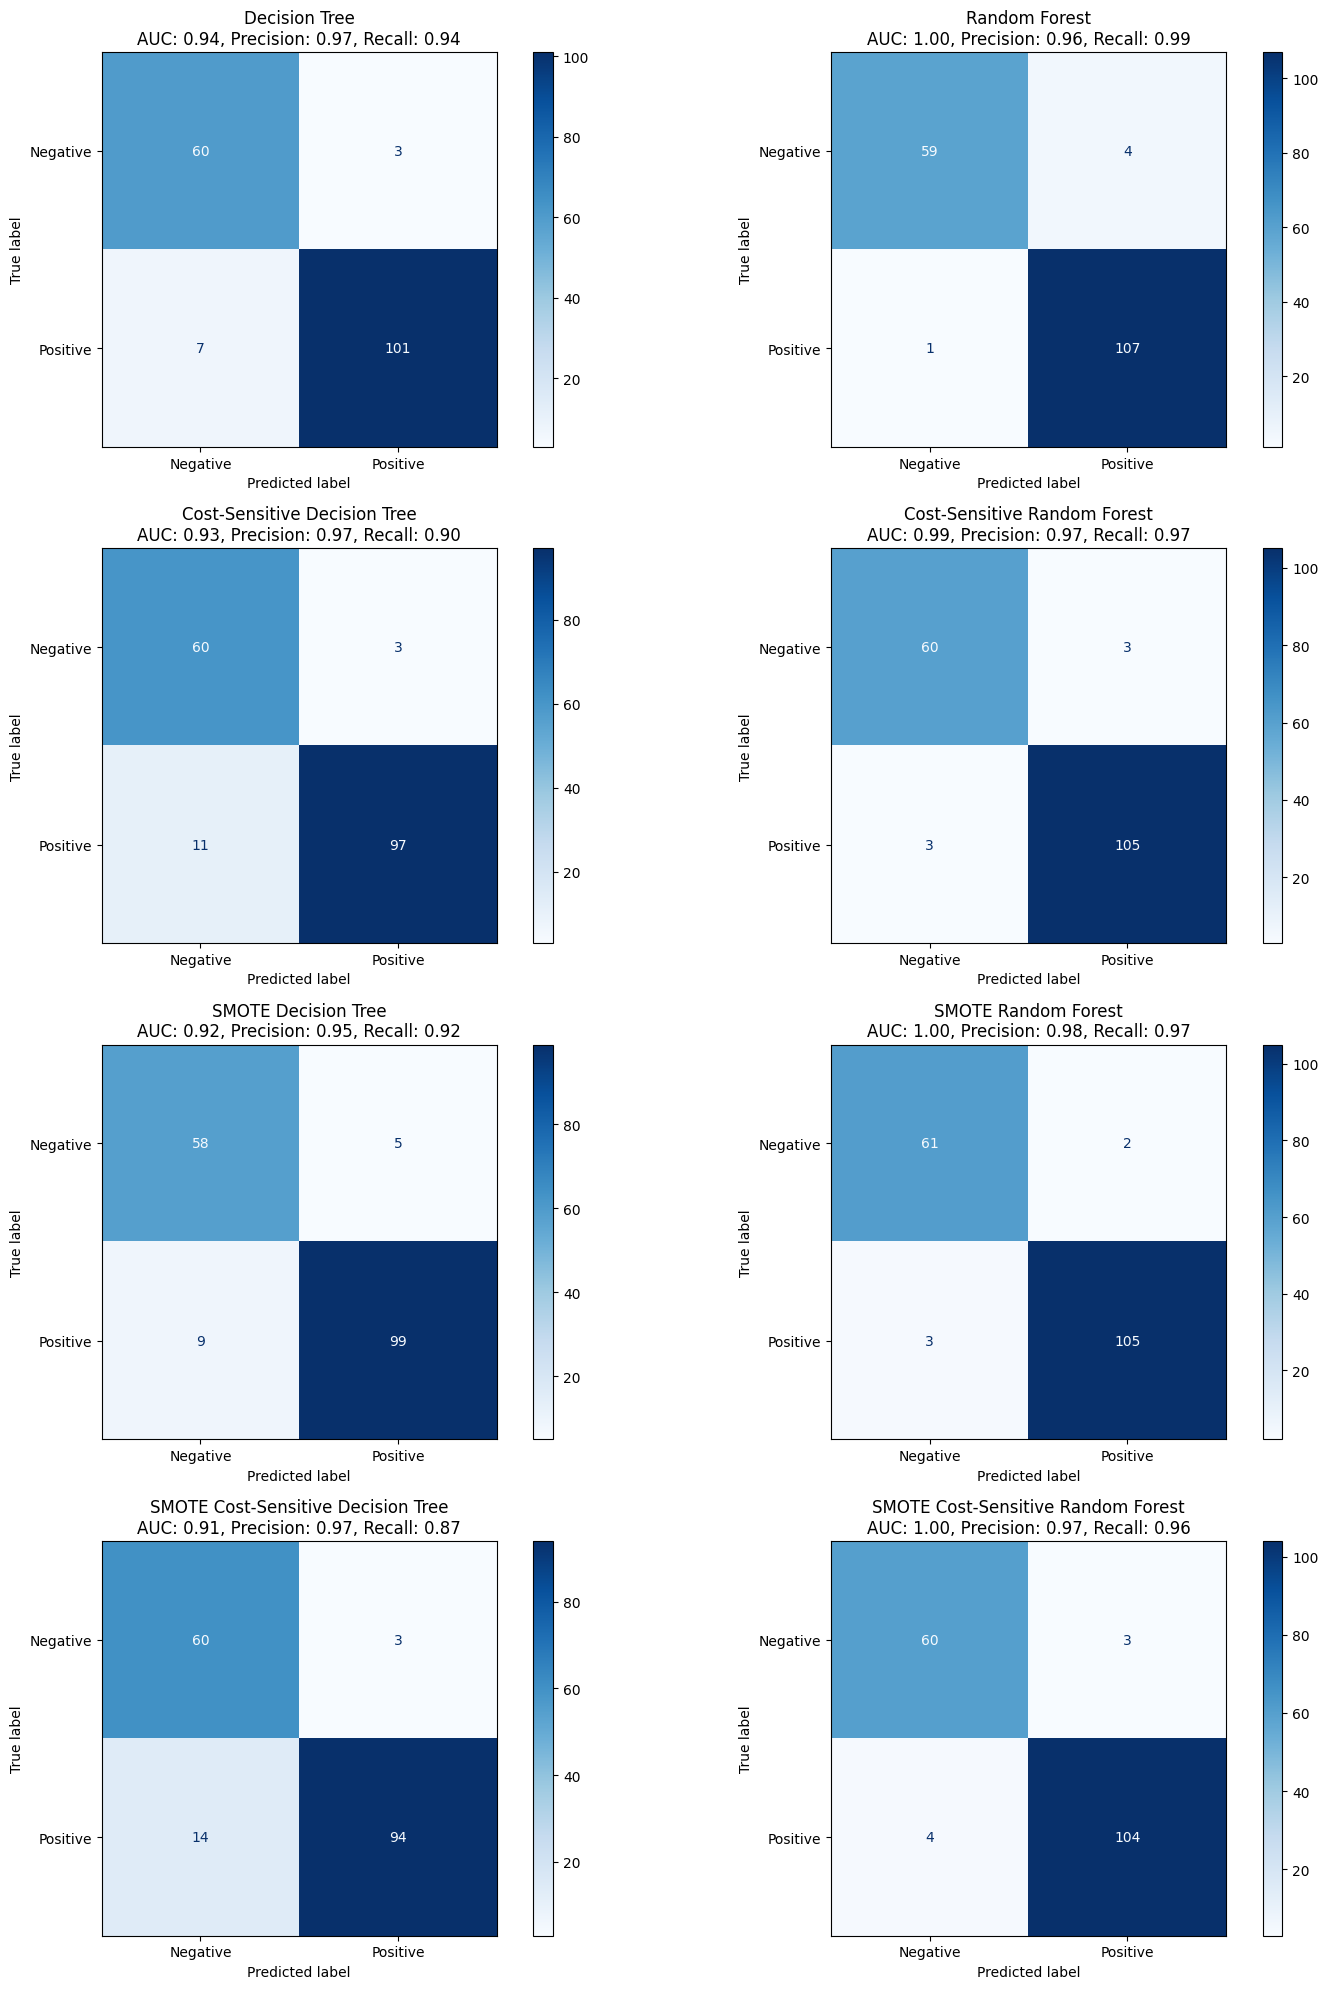

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Class weights for cost-sensitive learning
class_weights = {0: 1, 1: 5}  # Example weights, adjust as necessary

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Cost-Sensitive Decision Tree": DecisionTreeClassifier(random_state=42, class_weight=class_weights),
    "Cost-Sensitive Random Forest": RandomForestClassifier(random_state=42, class_weight=class_weights),
    "SMOTE Decision Tree": ImbPipeline([('smote', SMOTE(random_state=42)), ('clf', DecisionTreeClassifier(random_state=42))]),
    "SMOTE Random Forest": ImbPipeline([('smote', SMOTE(random_state=42)), ('clf', RandomForestClassifier(random_state=42))]),
    "SMOTE Cost-Sensitive Decision Tree": ImbPipeline([('smote', SMOTE(random_state=42)), ('clf', DecisionTreeClassifier(random_state=42, class_weight=class_weights))]),
    "SMOTE Cost-Sensitive Random Forest": ImbPipeline([('smote', SMOTE(random_state=42)), ('clf', RandomForestClassifier(random_state=42, class_weight=class_weights))]),
}

# Evaluate models
results = []
for name, model in models.items():
    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0]*len(y_test)

    # Metrics
    auc = roc_auc_score(y_test, y_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results.append((name, auc, precision, recall))

# Plotting
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
axs = axs.flatten()

for i, (name, auc, precision, recall) in enumerate(results):
    # Confusion matrix
    model = models[name]
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

    # Plot
    disp.plot(ax=axs[i], cmap=plt.cm.Blues)
    title = f"{name}\nAUC: {auc:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}"
    axs[i].set_title(title)

plt.tight_layout()
plt.show()
